<a href="https://colab.research.google.com/github/Gauravds435/colabtools/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/My Drive/CHDdata.csv")
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
import seaborn as sns

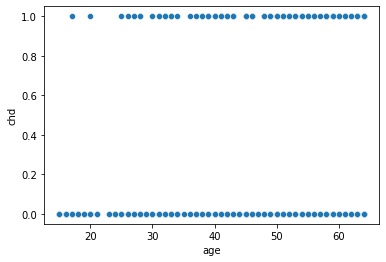

In [5]:
sns.scatterplot(x = "age", y= "chd", data=df)

In [6]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
X = sm.add_constant(df[["age"]])
y = df["chd"]
logic_model = sm.Logit(y, X)
result = logic_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.568790
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.118     
Dependent Variable: chd              AIC:              529.5623  
Date:               2020-11-09 14:05 BIC:              537.8335  
No. Observations:   462              Log-Likelihood:   -262.78   
Df Model:           1                LL-Null:          -298.05   
Df Residuals:       460              LLR p-value:      4.4964e-17
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -3.5217     0.4160   -8.4650   0.0000   -4.3371   -2.7063
age        0.0641     0.0085    7.5135   0.0000    0.0474 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
logreg.score(X, y)

0.6796536796536796

In [13]:
y_pred = logreg.predict(X)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_metrix = confusion_matrix(y, y_pred)
print(confusion_metrix)

[[243  59]
 [ 89  71]]


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.77       302
           1       0.55      0.44      0.49       160

    accuracy                           0.68       462
   macro avg       0.64      0.62      0.63       462
weighted avg       0.67      0.68      0.67       462



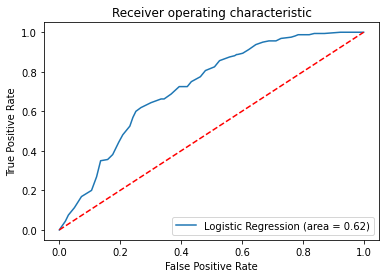

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logic_roc_auc = roc_auc_score(y, logreg.predict(X))
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()